In [281]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

import xlrd


<Figure size 2880x4320 with 0 Axes>

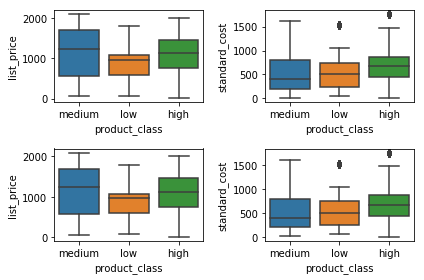

In [282]:
plt.figure(figsize = (40,60))
f, axes = plt.subplots(2, 2)

sns.boxplot(x = 'product_class', y = 'list_price', data = df_transaction, ax=axes[0,0])
sns.boxplot(x = 'product_class', y = 'standard_cost', data = df_transaction, ax=axes[0,1])
sns.boxplot(x = 'product_class', y = 'list_price', data = df_transaction, ax=axes[1,0])
sns.boxplot(x = 'product_class', y = 'standard_cost', data = df_transaction, ax=axes[1,1])
plt.tight_layout()

# 1. Transaction

In [283]:
df_transaction = pd.read_excel('KPMG.xlsx', sheet_name= 'Transactions')
df_transaction['online_order'] = df_transaction['online_order'].astype(bool)
df_transaction.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25         False   
1               2           3         3120       2017-05-21          True   
2               3          37          402       2017-10-16         False   
3               4          88         3135       2017-08-31         False   
4               5          78          787       2017-10-01          True   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0

In [284]:
test1 = df_transaction.groupby(['product_line','product_class','product_size'])['list_price','standard_cost'].agg(['min', 'max', 'mean', 'median', 'count', 'sum'])
test1

list_price                        \
                                               min      max         mean   
product_line product_class product_size                                    
Mountain     low           medium           574.64   574.64   574.640000   
                           small            688.63   688.63   688.630000   
Road         high          large             12.01   774.53   389.319119   
             low           medium           980.37   980.37   980.370000   
                           small            590.26  1720.70  1131.447739   
             medium        large           1240.31  1894.19  1633.080333   
                           medium           290.62  1538.99   757.090498   
                           small           1703.52  1810.00  1758.834286   
Standard     high          large           1842.92  1842.92  1842.920000   
                           medium           227.88  2005.66  1019.530301   
                           small           1661.92  1977.36  1824.646984   
             low           medium            71.16  1793.43   912.564852   
             medium        large            202.62  2091.47  1457.405335   
                           medium            60.34  1992.93  1002.618560   
                           small            175.89  1775.81  1129.478565   
Touring      low           medium          1073.07  1073.07  1073.070000   
             medium        large           1362.99  2083.94  1808.898470   
                           medium          1466.68  1466.68  1466.680000   

                                                                    \
                                          median count         sum   
product_line product_class product_size                              
Mountain     low           medium         574.64   223   128144.72   
                           small          688.63   200   137726.00   
Road         high          large           12.01   386   150277.18   
             low           medium         980.37   201   197054.37   
                           small         1172.78   522   590615.72   
             medium        large         1777.80   630  1028840.61   
                           medium         544.05  1846  1397589.06   
                           small         1810.00   385   677151.20   
Standard     high          large         1842.92   190   350154.80   
                           medium        1129.13  2059  2099212.89   
                           small         1977.36   378   689716.56   
             low           medium         958.74  1589  1450065.55   
             medium        large         1635.30  1953  2846312.62   
                           medium        1151.96  6655  6672426.52   
                           small         1311.44  1352  1527055.02   
Touring      low           medium        1073.07   229   245733.03   
             medium        large         1890.39   817  1477870.05   
                           medium        1466.68   188   275735.84   

                                        standard_cost                        \
                                                  min      max         mean   
product_line product_class product_size                                       
Mountain     low           medium              459.71   459.71   459.710000   
                           small               612.88   612.88   612.880000   
Road         high          large                 7.21   464.72   233.594482   
             low           medium              234.43   234.43   234.430000   
                           small               525.33  1531.42  1006.985728   
             medium        large               598.76   820.78   731.503048   
                           medium              206.35   829.65   495.496054   
                           small              1516.13  1610.90  1565.361169   
Standard     high          large              1105.75  1105.75  1105.750000   
                        

In [285]:
test1 = test1.reset_index()
test1

product_line product_class product_size list_price                        \
                                                  min      max         mean   
0      Mountain           low       medium     574.64   574.64   574.640000   
1      Mountain           low        small     688.63   688.63   688.630000   
2          Road          high        large      12.01   774.53   389.319119   
3          Road           low       medium     980.37   980.37   980.370000   
4          Road           low        small     590.26  1720.70  1131.447739   
5          Road        medium        large    1240.31  1894.19  1633.080333   
6          Road        medium       medium     290.62  1538.99   757.090498   
7          Road        medium        small    1703.52  1810.00  1758.834286   
8      Standard          high        large    1842.92  1842.92  1842.920000   
9      Standard          high       medium     227.88  2005.66  1019.530301   
10     Standard          high        small    1661.92  1977.36  1824.646984   
11     Standard           low       medium      71.16  1793.43   912.564852   
12     Standard        medium        large     202.62  2091.47  1457.405335   
13     Standard        medium       medium      60.34  1992.93  1002.618560   
14     Standard        medium        small     175.89  1775.81  1129.478565   
15      Touring           low       medium    1073.07  1073.07  1073.070000   
16      Touring        medium        large    1362.99  2083.94  1808.898470   
17      Touring        medium       medium    1466.68  1466.68  1466.680000   

                              standard_cost                                 \
     median count         sum           min      max         mean   median   
0    574.64   223   128144.72        459.71   459.71   459.710000   459.71   
1    688.63   200   137726.00        612.88   612.88   612.880000   612.88   
2     12.01   386   150277.18          7.21   464.72   233.594482     7.21   
3    980.37   201   197054.37        234.43   234.43   234.430000   234.43   
4   1172.78   522   590615.72        525.33  1531.42  1006.985728  1043.77   
5   1777.80   630  1028840.61        598.76   820.78   731.503048   795.10   
6    544.05  1846  1397589.06        206.35   829.65   495.496054   407.54   
7   1810.00   385   677151.20       1516.13  1610.90  1565.361169  1610.90   
8   1842.92   190   350154.80       1105.75  1105.75  1105.750000  1105.75   
9   1129.13  2059  2099212.89        136.73  1203.40   611.718295   677.48   
10  1977.36   378   689716.56       1479.11  1759.85  1623.936190  1759.85   
11   958.74  1589  1450065.55         56.93   748.90   335.496576   290.41   
12  1635.30  1953  2846312.62        151.96   993.66   552.551388   582.48   
13  1151.96  6655  6672426.52         13.44   954.82   367.519121   230.09   
14  1311.44  1352  1527055.02        131.92  1580.47  1001.811568  1167.18   
15  1073.07   229   245733.03        933.84   933.84   933.840000   933.84   
16  1890.39   817  1477870.05         57.74   863.95   449.254211   260.14   
17  1466.68   188   275735.84        363.25   363.25   363.250000   363.25   

                        
   count           sum  
0    223  1.025153e+05  
1    200  1.225760e+05  
2    386  9.016747e+04  
3    201  4.712043e+04  
4    522  5.256466e+05  
5    630  4.608469e+05  
6   1846  9.146857e+05  
7    385  6.026641e+05  
8    190  2.100925e+05  
9   2059  1.259528e+06  
10   378  6.138479e+05  
11  1589  5.331041e+05  
12  1953  1.079133e+06  
13  6655  2.445840e+06  
14  1352  1.354449e+06  
15   229  2.138494e+05  
16   817  3.670407e+05  
17   188  6.829100e+04

In [286]:
df_transaction.groupby(['product_class', 'online_order'])['list_price'].agg('sum')

product_class  online_order
high           False           1565165.77
               True            1724195.66
low            False           1300569.58
               True            1448769.81
medium         False           7887332.58
               True            8015648.34
Name: list_price, dtype: float64

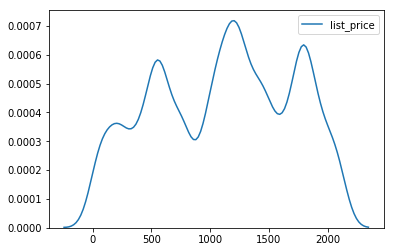

In [287]:
sns.kdeplot(df_transaction['list_price'])

In [288]:
df_transaction['list_price'].min()

12.01

In [289]:
df_transaction['list_price'].max()

2091.47

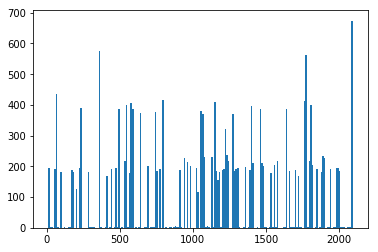

In [290]:
plt.hist(df_transaction['list_price'], bins =200)
plt.show()

# khi muốn xem data distribition thì mình có 2 cách: kdeplot/histogram


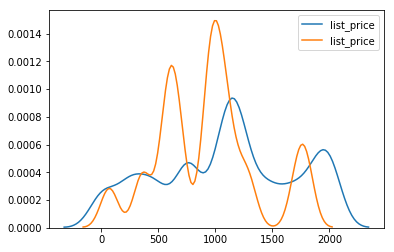

In [291]:
# kde giup visualize sự phân bổ của dữ liệu. 
sns.kdeplot(df_transaction.loc[df_transaction.product_class == 'high', 'list_price'])
sns.kdeplot(df_transaction.loc[df_transaction.product_class == 'low', 'list_price'])

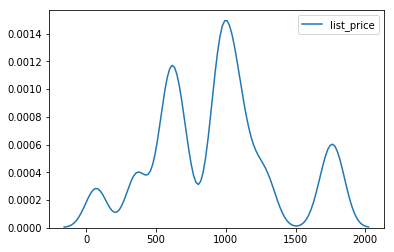

In [292]:
sns.kdeplot(df_transaction.loc[df_transaction.product_class == 'low', 'list_price'])

<Figure size 2160x2160 with 0 Axes>

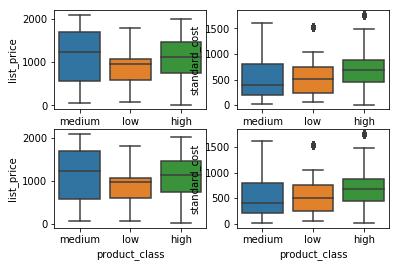

In [293]:
plt.figure(figsize = (30,30))
f, axes = plt.subplots(2, 2)

sns.boxplot(x = 'product_class', y = 'list_price', data = df_transaction, ax=axes[0,0])
sns.boxplot(x = 'product_class', y = 'standard_cost', data = df_transaction, ax=axes[0,1])
sns.boxplot(x = 'product_class', y = 'list_price', data = df_transaction, ax=axes[1,0])
sns.boxplot(x = 'product_class', y = 'standard_cost', data = df_transaction, ax=axes[1,1])




<Figure size 2160x2160 with 0 Axes>

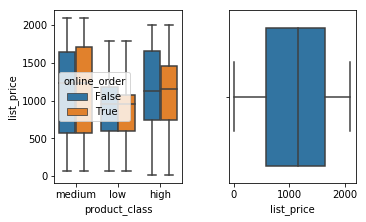

In [294]:
plt.figure(figsize = (30,30))
f, axes = plt.subplots(1, 2)
sns.boxplot(x= 'product_class', y = 'list_price', hue = 'online_order', data = df_transaction, ax = axes[0])
sns.boxplot(df_transaction.list_price , ax = axes[1])
plt.tight_layout(4)

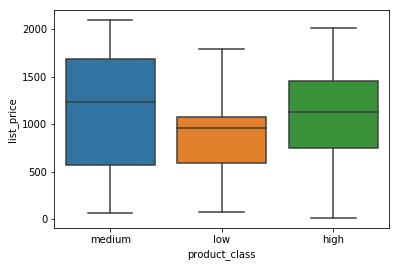

In [295]:
sns.boxplot(x= 'product_class', y = 'list_price', data = df_transaction)
plt.show()

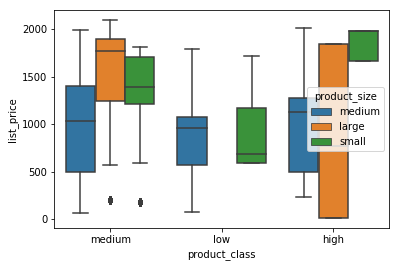

In [296]:
sns.boxplot(x= 'product_class', y = 'list_price', hue = 'product_size',  data = df_transaction)

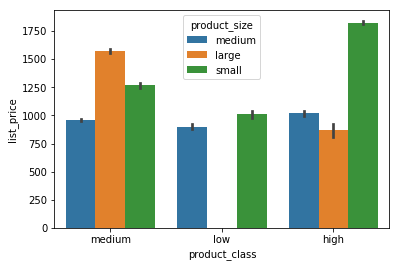

In [297]:
sns.barplot(x= 'product_class', y = 'list_price', hue = 'product_size',  data = df_transaction)

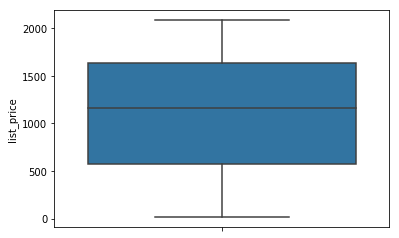

In [298]:
sns.boxplot(df_transaction.list_price, orient = 'v')

In [299]:
df_transaction['gap_price'] = df_transaction['list_price'] - df_transaction['standard_cost']
df_transaction['divide_price'] = df_transaction['list_price'] * 100 / df_transaction['standard_cost']
df_transaction['gap_price'].agg(['min', 'max', 'mean'])

# df_transaction[(df_transaction['divide_price'] > 50) & (df_transaction['divide_price'] < 1200)].head()


min        4.800000
max     1702.550000
mean     551.950915
Name: gap_price, dtype: float64

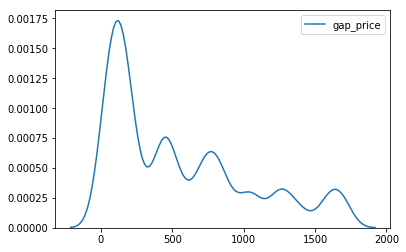

In [300]:
sns.kdeplot(df_transaction['gap_price'])

In [301]:
#Nhin graph phia tren thi minh thay no bi lech trai (skew). 
# dua vao skew thi ta co the biet duoc mean bi anh huong nhu the nao

In [302]:
groupby_status_product_class = df_transaction.groupby(['online_order', 'product_class'])['list_price'].agg('count') 
groupby_status_product_class

online_order  product_class
False         high             1433
              low              1397
              medium           6876
True          high             1580
              low              1567
              medium           6950
Name: list_price, dtype: int64

In [303]:
# sns.barplot(x= 'product_class', y = 'list_price', hue = 'online_order', data = groupby_status_product_class)

In [304]:
groupby_status_product_class = df_transaction.groupby(['online_order', 'product_class'])['list_price'].agg('count') 

groupby_status_product_class = pd.DataFrame(groupby_status_product_class).reset_index()
groupby_status_product_class

online_order product_class  list_price
0         False          high        1433
1         False           low        1397
2         False        medium        6876
3          True          high        1580
4          True           low        1567
5          True        medium        6950

In [305]:
# ?? phan biet index va column trong data frame? index va multiple index.

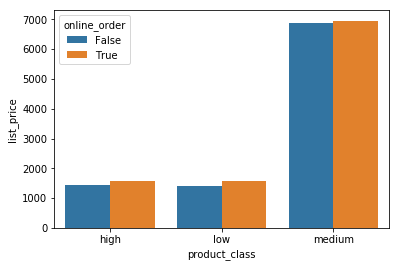

In [306]:
sns.barplot(x= 'product_class', y = 'list_price', hue = 'online_order', data = groupby_status_product_class)

# 2. Customer List

In [307]:
df_NewCustomerList = pd.read_excel('KPMG.xlsx', sheet_name='NewCustomerList')
df_NewCustomerList['address'].sort_values().head(100)

721                0 Bay Drive
138           0 Dexter Parkway
624              0 Emmet Trail
300             0 Esker Avenue
685             0 Express Lane
546              0 Kipling Way
644               0 Larry Park
305         0 Mayfield Parkway
99       0 Meadow Ridge Street
469            0 Memorial Road
78         0 Mockingbird Plaza
524          0 Nelson Crossing
325           0 Stoughton Park
894            0 Summit Center
446            0 Union Parkway
501                0 Veith Way
413            00 Judy Terrace
757       00 Southridge Avenue
298         00003 Hoffman Pass
803      005 Kensington Street
456           005 Loeprich Way
883       01 Bunker Hill Drive
642         01 Reindahl Circle
39         011 Northland Trail
333          01124 Dottie Lane
214         013 David Junction
315          016 Westport Park
179      0193 Northland Street
353          0197 Sachs Avenue
198            02 Hoffman Road
                ...           
60       06936 Bobwhite Circle
911     

In [308]:
df_NewCustomerList['address_copy'] = df_NewCustomerList['address'].copy()

In [309]:
#String manipulation in python: https://www.pythonforbeginners.com/basics/string-manipulation-in-python
df_NewCustomerList['address_2'] = df_NewCustomerList['address'].str.strip("0")
df_NewCustomerList['address_2'].sort_values().head(100)




721                    Bay Drive
138               Dexter Parkway
624                  Emmet Trail
300                 Esker Avenue
685                 Express Lane
413                 Judy Terrace
546                  Kipling Way
644                   Larry Park
305             Mayfield Parkway
99           Meadow Ridge Street
469                Memorial Road
78             Mockingbird Plaza
524              Nelson Crossing
757            Southridge Avenue
325               Stoughton Park
894                Summit Center
446                Union Parkway
501                    Veith Way
804            1 Alpine Crossing
856             1 Becker Parkway
518              1 Bluejay Court
128              1 Bluejay Place
883          1 Bunker Hill Drive
695                1 Elgar Alley
766                1 Eliot Plaza
476            1 Fair Oaks Alley
754                 1 Fordem Way
481            1 Graceland Plaza
347           1 Kinsman Crossing
890               1 Mandrake Way
          

address                 address_2  \
721               0 Bay Drive                 Bay Drive   
138          0 Dexter Parkway            Dexter Parkway   
624             0 Emmet Trail               Emmet Trail   
300            0 Esker Avenue              Esker Avenue   
685            0 Express Lane              Express Lane   
546             0 Kipling Way               Kipling Way   
644              0 Larry Park                Larry Park   
305        0 Mayfield Parkway          Mayfield Parkway   
99      0 Meadow Ridge Street       Meadow Ridge Street   
469           0 Memorial Road             Memorial Road   
78        0 Mockingbird Plaza         Mockingbird Plaza   
524         0 Nelson Crossing           Nelson Crossing   
325          0 Stoughton Park            Stoughton Park   
894           0 Summit Center             Summit Center   
446           0 Union Parkway             Union Parkway   
501               0 Veith Way                 Veith Way   
413           00 Judy Terrace              Judy Terrace   
757      00 Southridge Avenue         Southridge Avenue   
298        00003 Hoffman Pass            3 Hoffman Pass   
803     005 Kensington Street       5 Kensington Street   
456          005 Loeprich Way            5 Loeprich Way   
883      01 Bunker Hill Drive       1 Bunker Hill Drive   
642        01 Reindahl Circle         1 Reindahl Circle   
39        011 Northland Trail        11 Northland Trail   
333         01124 Dottie Lane          1124 Dottie Lane   
214        013 David Junction         13 David Junction   
315         016 Westport Park          16 Westport Park   
179     0193 Northland Street      193 Northland Street   
353         0197 Sachs Avenue          197 Sachs Avenue   
198           02 Hoffman Road            2 Hoffman Road   
..                        ...                       ...   
984        9594 Badeau Street        9594 Badeau Street   
775      95960 Warner Parkway      95960 Warner Parkway   
795          96 Hermina Place          96 Hermina Place   
451         96 Rutledge Drive         96 Rutledge Drive   
72       9608 Heffernan Drive      9608 Heffernan Drive   
712       96081 Lakewood Hill       96081 Lakewood Hill   
65     9630 Cottonwood Avenue    9630 Cottonwood Avenue   
454        9645 Moose Terrace        9645 Moose Terrace   
196      96515 Di Loreto Pass      96515 Di Loreto Pass   
102      966 Sunnyside Center      966 Sunnyside Center   
620         97 Merrick Center         97 Merrick Center   
395        97 Transport Plaza        97 Transport Plaza   
125        9722 Northport Way        9722 Northport Way   
378        9736 Mitchell Pass        9736 Mitchell Pass   
610         976 Roxbury Alley         976 Roxbury Alley   
633          98 Shoshone Road          98 Shoshone Road   
156        98158 Alpine Point        98158 Alpine Point   
192  98221 Pennsylvania Place  98221 Pennsylvania Place   
286      984 Del Sol Junction      984 Del Sol Junction   
761          98454 Dapin Park          98454 Dapin Park   
482       98555 Victoria Hill       98555 Victoria Hill   
66        989 Graedel Terrace       989 Graedel Terrace   
960       99 Park Meadow Hill       99 Park Meadow Hill   
488         99 Quincy Parkway         99 Quincy Parkway   
654        99 Sherman Parkway        99 Sherman Parkway   
308          99 Westend Court          99 Westend Court   
336        990 Hoffman Avenue        990 Hoffman Avenue   
796    99376 Namekagon Street    99376 Namekagon Street   
583         9940 Manley Drive         9940 Manley Drive   
50              998 Gale Park             998 Gale Park   

                 address_copy  
721               0 Bay Drive  
138          0 Dexter Parkway  
624             0 Emmet Trail  
300            0 Esker Avenue  
685            0 Express Lane  
546             0 Kipling Way  
644              0 Larry Park  
305        0 Mayfield Parkway  
99      0 Meadow Ridge Street  
469           0 Memorial Road  
78        0

In [344]:
def num_there(s):
    return any(i.isdigit() for i in s)

def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

df_NewCustomerList['include_number'] = num_there(df_NewCustomerList['address_copy'])
# df_NewCustomerList[df_NewCustomerList['include_number'] == True]['address']

Series([], Name: address, dtype: object)

In [345]:
df_NewCustomerList[['address', 'address_2', 'address_copy', 'include_number' ]].sort_values('address_copy')

address                 address_2  \
721               0 Bay Drive                 Bay Drive   
138          0 Dexter Parkway            Dexter Parkway   
624             0 Emmet Trail               Emmet Trail   
300            0 Esker Avenue              Esker Avenue   
685            0 Express Lane              Express Lane   
546             0 Kipling Way               Kipling Way   
644              0 Larry Park                Larry Park   
305        0 Mayfield Parkway          Mayfield Parkway   
99      0 Meadow Ridge Street       Meadow Ridge Street   
469           0 Memorial Road             Memorial Road   
78        0 Mockingbird Plaza         Mockingbird Plaza   
524         0 Nelson Crossing           Nelson Crossing   
325          0 Stoughton Park            Stoughton Park   
894           0 Summit Center             Summit Center   
446           0 Union Parkway             Union Parkway   
501               0 Veith Way                 Veith Way   
413           00 Judy Terrace              Judy Terrace   
757      00 Southridge Avenue         Southridge Avenue   
298        00003 Hoffman Pass            3 Hoffman Pass   
803     005 Kensington Street       5 Kensington Street   
456          005 Loeprich Way            5 Loeprich Way   
883      01 Bunker Hill Drive       1 Bunker Hill Drive   
642        01 Reindahl Circle         1 Reindahl Circle   
39        011 Northland Trail        11 Northland Trail   
333         01124 Dottie Lane          1124 Dottie Lane   
214        013 David Junction         13 David Junction   
315         016 Westport Park          16 Westport Park   
179     0193 Northland Street      193 Northland Street   
353         0197 Sachs Avenue          197 Sachs Avenue   
198           02 Hoffman Road            2 Hoffman Road   
..                        ...                       ...   
984        9594 Badeau Street        9594 Badeau Street   
775      95960 Warner Parkway      95960 Warner Parkway   
795          96 Hermina Place          96 Hermina Place   
451         96 Rutledge Drive         96 Rutledge Drive   
72       9608 Heffernan Drive      9608 Heffernan Drive   
712       96081 Lakewood Hill       96081 Lakewood Hill   
65     9630 Cottonwood Avenue    9630 Cottonwood Avenue   
454        9645 Moose Terrace        9645 Moose Terrace   
196      96515 Di Loreto Pass      96515 Di Loreto Pass   
102      966 Sunnyside Center      966 Sunnyside Center   
620         97 Merrick Center         97 Merrick Center   
395        97 Transport Plaza        97 Transport Plaza   
125        9722 Northport Way        9722 Northport Way   
378        9736 Mitchell Pass        9736 Mitchell Pass   
610         976 Roxbury Alley         976 Roxbury Alley   
633          98 Shoshone Road          98 Shoshone Road   
156        98158 Alpine Point        98158 Alpine Point   
192  98221 Pennsylvania Place  98221 Pennsylvania Place   
286      984 Del Sol Junction      984 Del Sol Junction   
761          98454 Dapin Park          98454 Dapin Park   
482       98555 Victoria Hill       98555 Victoria Hill   
66        989 Graedel Terrace       989 Graedel Terrace   
960       99 Park Meadow Hill       99 Park Meadow Hill   
488         99 Quincy Parkway         99 Quincy Parkway   
654        99 Sherman Parkway        99 Sherman Parkway   
308          99 Westend Court          99 Westend Court   
336        990 Hoffman Avenue        990 Hoffman Avenue   
796    99376 Namekagon Street    99376 Namekagon Street   
583         9940 Manley Drive         9940 Manley Drive   
50              998 Gale Park             998 Gale Park   

                 address_copy  include_number  
721               0 Bay Drive           False  
138          0 Dexter Parkway           False  
624             0 Emmet Trail           False  
300            0 Esker Avenue           False  
685            0 Express Lane           False  
546             0 Kipling Way           False  
644              0 Larry Pa

# 3. Customer Demographic

In [312]:
df_CustomerDemographic = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')
df_CustomerDemographic.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property      Mass Customer                  N   
3                    IT      Mass Customer                  N   
4                   NaN  Affluent Customer                  N   

                                             default owns_car  tenure  
0                                                 "'      Yes    11.0  
1                       <script>alert('hi')</script>      Yes    16.0  
2                                2018-02-01 00:00:00      Yes    15.0  
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                NIL      Yes     8.0

In [313]:
df_CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


In [314]:
df_check_age = df_CustomerDemographic[['customer_id', 'first_name', 'DOB']].dropna()
df_check_age['DOB'].min()

Timestamp('1843-12-21 00:00:00')

In [315]:
df_check_age['Year'] = df_check_age['DOB'].dt.strftime('%Y')
df_check_age['Age'] = int(dt.datetime.today().strftime("%Y")) - df_check_age['Year'].astype(int)
print('min age: ', df_check_age['Age'].min())
print('max age: ', df_check_age['Age'].max())

min age:  17
max age:  176


In [316]:
df_check_age.head()

customer_id      first_name        DOB  Year  Age
0            1         Laraine 1953-10-12  1953   66
1            2             Eli 1980-12-16  1980   39
2            3           Arlin 1954-01-20  1954   65
3            4          Talbot 1961-10-03  1961   58
4            5  Sheila-kathryn 1977-05-13  1977   42

In [317]:
df_check_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 5 columns):
customer_id    3913 non-null int64
first_name     3913 non-null object
DOB            3913 non-null datetime64[ns]
Year           3913 non-null object
Age            3913 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 183.4+ KB


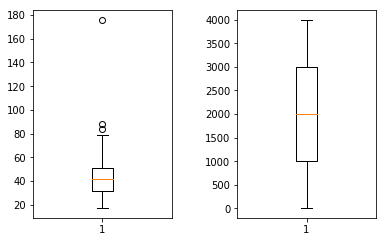

In [318]:

fig, axs = plt.subplots(1, 2)
axs[0].boxplot(df_check_age['Age'])
axs[1].boxplot(df_check_age['customer_id'])
plt.tight_layout(pad=3)
plt.savefig('pic_test2.png')
plt.show()


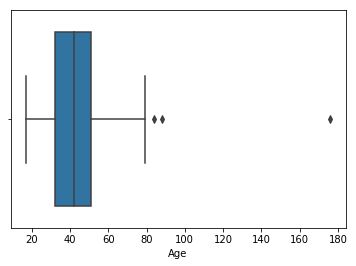

In [319]:
sns.boxplot(df_check_age['Age'])

In [320]:
df_check_age[(df_check_age['Age'] > 30) & (df_check_age['Age'] < 80)]['customer_id'].count()


3069

In [321]:
df_output = df_check_age[(df_check_age['Age'] > 30) & (df_check_age['Age'] < 80)][['DOB','Year', 'Age']]
df_output.head()

DOB  Year  Age
0 1953-10-12  1953   66
1 1980-12-16  1980   39
2 1954-01-20  1954   65
3 1961-10-03  1961   58
4 1977-05-13  1977   42

In [322]:
df_output.to_csv('ouput2.csv')

In [323]:
#slicing in dataframe
#dung ham loc để slicing. format ham loc : loc[x, y]. Trong đó x là để slice row, còn y để slice cột
# có thể dùng iloc để slicing thay cho loc. Hàm iloc chỉ slice bằng idex
df_output.iloc[2:5,1:3]

Year  Age
2  1954   65
3  1961   58
4  1977   42

In [324]:

df_CustomerDemographic[df_CustomerDemographic['DOB'] == '1843-12-21']

customer_id first_name last_name gender  \
33           34   Jephthah  Bachmann      U   

    past_3_years_bike_related_purchases        DOB        job_title  \
33                                   59 1843-12-21  Legal Assistant   

   job_industry_category     wealth_segment deceased_indicator default  \
33                    IT  Affluent Customer                  N     NaN   

   owns_car  tenure  
33       No    20.0

In [325]:
df_CustomerAddress = pd.read_excel('KPMG.xlsx', sheet_name='CustomerAddress')
df_CustomerAddress.head()

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [326]:
df_CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


In [327]:
df_CustomerDemographic.describe()

customer_id  past_3_years_bike_related_purchases       tenure
count  4000.000000                          4000.000000  3913.000000
mean   2000.500000                            48.890000    10.657041
std    1154.844867                            28.715005     5.660146
min       1.000000                             0.000000     1.000000
25%    1000.750000                            24.000000     6.000000
50%    2000.500000                            48.000000    11.000000
75%    3000.250000                            73.000000    15.000000
max    4000.000000                            99.000000    22.000000

In [328]:
df_CustomerDemographic.describe(include = 'object')

first_name last_name  gender                             job_title  \
count        4000      3875    4000                                  3494   
unique       3139      3725       6                                   195   
top           Max  Pristnor  Female  Business Systems Development Analyst   
freq            5         3    2037                                    45   

       job_industry_category wealth_segment deceased_indicator  default  \
count                   3344           4000               4000     3698   
unique                     9              3                  2       90   
top            Manufacturing  Mass Customer                  N      100   
freq                     799           2000               3998      113   

       owns_car  
count      4000  
unique        2  
top         Yes  
freq       2024

In [329]:
df_CustomerDemographic['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [330]:
df_CustomerDemographic['gender'] = df_CustomerDemographic['gender'].replace(['F', 'Femal'], 'Female')
df_CustomerDemographic['gender'].unique()

array(['Female', 'Male', 'U', 'M'], dtype=object)

In [331]:
df_CustomerDemographic['gender'] = df_CustomerDemographic['gender'].replace('M','Male')
df_CustomerDemographic['gender'].unique()

array(['Female', 'Male', 'U'], dtype=object)

In [332]:
df_CustomerDemographic_2 = df_CustomerDemographic.dropna()

In [333]:
df_CustomerDemographic_2['Year'] = df_CustomerDemographic_2['DOB'].dt.strftime('%Y')
df_CustomerDemographic_2['Age'] = int(dt.datetime.today().strftime("%Y")) - df_CustomerDemographic_2['Year'].astype(int)
print('min age: ', df_CustomerDemographic_2['Age'].min())
print('max age: ', df_CustomerDemographic_2['Age'].max())



min age:  17
max age:  88


/Users/ngovinh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ngovinh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [334]:
print('customer date max: ',df_NewCustomerList['DOB'].max())
print('customer date min: ',df_NewCustomerList['DOB'].min())

customer date max:  2002-02-27 00:00:00
customer date min:  1938-06-08 00:00:00


In [335]:
df_transaction_product_0 = df_transaction[df_transaction['product_id'] == 0]
df_transaction_product_0.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
34              35           0         2171       2017-08-20         False   
39              40           0         2448       2017-11-28          True   
54              55           0         3140       2017-09-18         False   
60              61           0         1839       2017-02-24         False   
63              64           0         2000       2017-07-08         False   

   order_status           brand product_line product_class product_size  \
34     Approved  Norco Bicycles         Road        medium       medium   
39     Approved  Norco Bicycles         Road        medium       medium   
54     Approved  Norco Bicycles     Standard           low       medium   
60     Approved      OHM Cycles         Road          high        large   
63     Approved   Trek Bicycles     Standard        medium       medium   

    list_price  standard_cost  product_first_sold_date  gap_price  \
34      544.05         376.84                  38647.0     167.21   
39      544.05         376.84                  38647.0     167.21   
54      363.01         290.41                  38482.0      72.60   
60       12.01           7.21                  34244.0       4.80   
63      499.53         388.72                  39031.0     110.81   

    divide_price  
34    144.371617  
39    144.371617  
54    124.999139  
60    166.574202  
63    128.506380

In [336]:
df_0 = df_transaction[df_transaction['product_id'] == 0][['product_id','customer_id', 'transaction_date', 'order_status']]
df_0.nunique()

product_id            1
customer_id         823
transaction_date    351
order_status          2
dtype: int64

In [337]:
df_0['product_id'].unique()


array([0])

In [338]:
-- Mỗi một col trong dataframe được gọi là Series

SyntaxError: invalid syntax (<ipython-input-338-80d073a59b6e>, line 1)

In [ ]:
df_0.info()

In [ ]:
# convert from Series to Dataframe
pd.DataFrame(df_0['product_id']).info()

# 2 things to struggle: 1. Data Type; 2: time format.
